In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import ast
%matplotlib inline

In [2]:
# https://www.kaggle.com/code/omasanani/zomato-eda-and-regression-analysis

In [3]:
#pd.set_option('display.max_columns', None)
plt.style.use('dark_background')
#sns.set_style("dark")
#pd.reset_option('display.max_columns')

In [4]:
#Loading the CSV
zomato = pd.read_csv('zomato.csv')

In [5]:
#Inforation and CSV Preview 
print(f'No of Rows : {zomato.shape[0]}  \nNo of Columns : {zomato.shape[1]} \n\n')

zomato.head(5)


No of Rows : 51717  
No of Columns : 17 




,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
# Dataset Information 

print(zomato.columns,'\n')
print(zomato.info(),'\n')
print(zomato.describe())

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     516

In [7]:
# Renaming the Columns 
zomato.rename(columns={
    'approx_cost(for two people)' : 'cost_for2',
    'listed_in(type)' : 'type',
    'listed_in(city)' : 'city'
},inplace=True)

zomato.head(0)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost_for2,reviews_list,menu_item,type,city


In [8]:
#Data Cleaning 
# 1.Datatype 

# Checking Column Datatypes and Editing Column 
zomato.dtypes


url             object
address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
phone           object
location        object
rest_type       object
dish_liked      object
cuisines        object
cost_for2       object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [9]:
# Changing the Datatype of Cost_for2 to float 
zomato['cost_for2'] = (zomato['cost_for2'].astype(str).str.replace(',', '' , regex=False).str.strip().astype(float))

#Descriptive Statistics 
zomato.describe()

,votes,cost_for2
count,51717.000000,51371.000000
mean,283.697527,555.431566
std,803.838853,438.850728
min,0.000000,40.000000
25%,7.000000,300.000000
50%,41.000000,400.000000
75%,198.000000,650.000000
max,16832.000000,6000.000000


In [10]:
# Extracting the part before / in rate column and converting its datatype to float  

zomato['rating_clean'] = zomato['rate'].astype(str).str.split('/').str[0]
zomato['rating_clean'] = pd.to_numeric(zomato['rating_clean'], errors='coerce')


url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost_for2         346
reviews_list        0
menu_item           0
type                0
city                0
rating_clean    10052
dtype: int64


<Axes: >

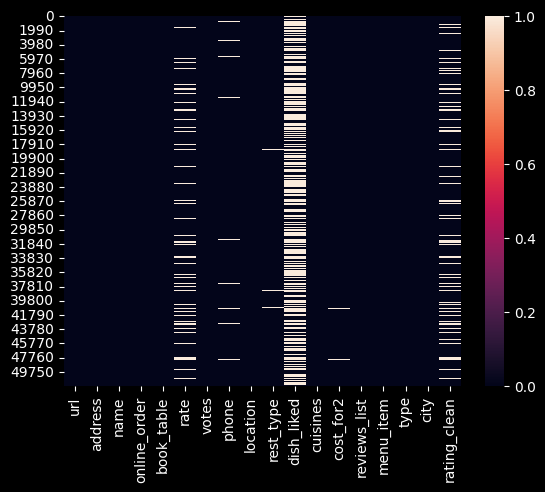

In [11]:
# 2. Checking Missing Values 
print(zomato.isnull().sum())
sns.heatmap(zomato.isnull())

In [12]:
# Checking Duplicates 
print(zomato.duplicated().sum())

0


In [13]:
# 3 Handling Missing Values 
print(zomato.isnull().sum())

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost_for2         346
reviews_list        0
menu_item           0
type                0
city                0
rating_clean    10052
dtype: int64


In [14]:
# Handling missing values in rating_clean column 
zomato['rating_clean'] = zomato['rating_clean'].fillna(zomato.groupby('cuisines')['rating_clean'].transform('mean'))

# Fill any remaining missing rating_clean values with global mean
zomato['rating_clean'] = zomato['rating_clean'].fillna(zomato['rating_clean'].mean())

In [15]:
# Handling Missing Values in rest_type column and converting it to String 
zomato['rest_type'] = zomato['rest_type'].fillna('Unknown').astype(str)
zomato.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type           0
dish_liked      28078
cuisines           45
cost_for2         346
reviews_list        0
menu_item           0
type                0
city                0
rating_clean        0
dtype: int64

In [16]:
# Dropping Columns with More than 50% Null/Missing Values
missing_values = zomato.isnull().mean() * 100

zomato.drop(columns = missing_values[missing_values > 50].index , inplace=True)

In [17]:
# Cleaning cost_for2 Column 
zomato['cost_for2'] = zomato['cost_for2'].fillna(zomato['cost_for2'].median())

In [18]:
# Cleaning Cuisines Column 
zomato['cuisines'] =  zomato['cuisines'].fillna(zomato['cuisines'].mode()[0])

In [19]:
# Reviews Column from reviwes_list but first convering it from string to list 
zomato['reviews_list'] =  zomato['reviews_list'].apply(lambda x : ast.literal_eval(x) if isinstance(x,str) else x )

zomato['reviews'] = zomato['reviews_list'].apply(lambda x : len(x) if isinstance(x,list) else 0)

In [20]:
# Removing rows with null values 

zomato.dropna(inplace=True)

In [21]:
# Dropping Unnecessary Columns 
zomato.isnull().sum()

zomato.drop(columns={'url','address','rate','phone','reviews_list'},inplace = True)

In [22]:
# Final Check 
zomato.reset_index(drop=True, inplace=True)
print(zomato.isnull().sum(),'\n') 
zomato.shape

name            0
online_order    0
book_table      0
votes           0
location        0
rest_type       0
cuisines        0
cost_for2       0
menu_item       0
type            0
city            0
rating_clean    0
reviews         0
dtype: int64 



(43110, 13)

# Exploratory Data Analysis


In [23]:
'''
Restaurants delivering Online or not
Restaurants allowing table booking or not
Table booking Rate vs Rate
Best Location
Relation between Location and Rating
Restaurant Type
Gaussian Rest type and Rating
Types of Services
Relation between Type and Rating
Cost of Restaurant
No. of restaurants in a Location
Restaurant type
Most famous restaurant chains in Bengaluru
'''

'\nRestaurants delivering Online or not\nRestaurants allowing table booking or not\nTable booking Rate vs Rate\nBest Location\nRelation between Location and Rating\nRestaurant Type\nGaussian Rest type and Rating\nTypes of Services\nRelation between Type and Rating\nCost of Restaurant\nNo. of restaurants in a Location\nRestaurant type\nMost famous restaurant chains in Bengaluru\n'

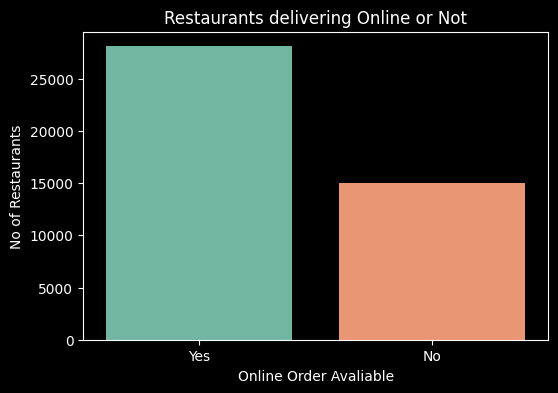

In [24]:
# Univariate Analysis 
# 1. Restaurants delivering Online or not

plt.figure(figsize=(6,4))
sns.countplot(x='online_order',data=zomato,hue='online_order',legend=False,palette='Set2')
plt.xlabel('Online Order Avaliable')
plt.ylabel('No of Restaurants')
plt.title('Restaurants delivering Online or Not')
plt.show()

In [25]:
# Insight of #1 and Solution 

#From the graph we can see that a majority of restaurants on Zomato already offer online ordering but a smaller amount of restaurants does not allow online ordering 

#To capture more market share, Zomato should focus on encouraging the remaining offline restaurants to join the platform by highlighting the revenue benefits.

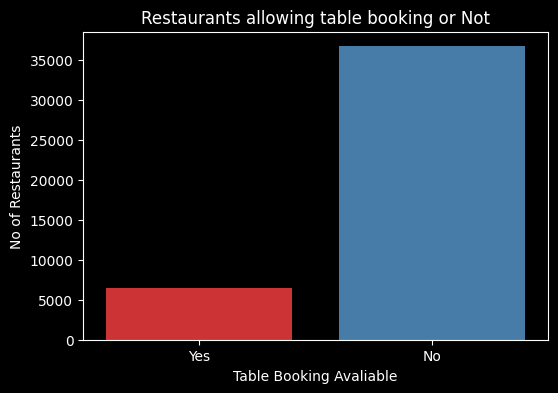

In [26]:
#2 Restaurants allowing table booking or not

plt.figure(figsize=(6,4))
sns.countplot(x='book_table',data=zomato,hue='book_table',legend=False,palette='Set1')
plt.xlabel('Table Booking Avaliable')
plt.ylabel('No of Restaurants')
plt.title('Restaurants allowing table booking or Not')
plt.show()


In [27]:
# Insight of #2 and Solution 

#We can see most restaurants do not allow table bookings which means most customers either walk in or book through other means 

#Encourage more restaurants in starting table bookings as it would result to decreased waiting time , managing customers efficiently and smooth experience 

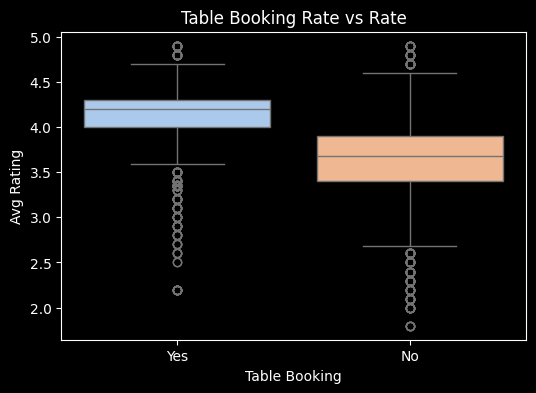

In [28]:
#3 Table booking vs Rating

plt.figure(figsize=(6,4))
sns.boxplot(x='book_table',y='rating_clean',data=zomato,hue='book_table',legend=False,palette='pastel')
plt.xlabel('Table Booking')
plt.ylabel('Avg Rating')
plt.title('Table Booking Rate vs Rate')
plt.show()

In [29]:
# Insight of #3 and Solution 

# We can see that the restaurants that allow table bookings has a bit higher average rating as compared to those who does not allow table booking 

# Encourage more restaurants to enable table booking by showing its link to higher customer ratings, which can attract more guests

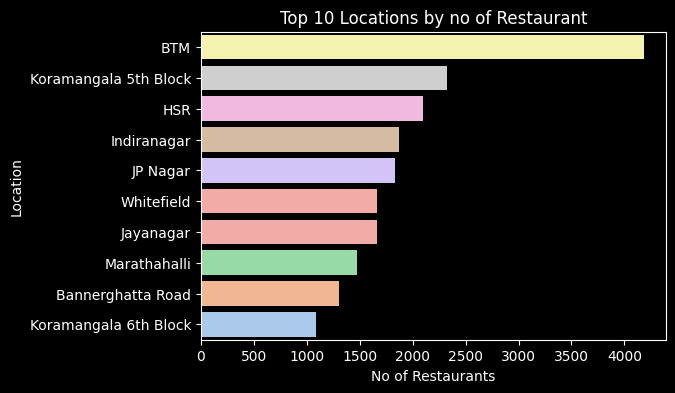

In [30]:
#4 Best Location

top_locations = zomato['location'].value_counts().head(10)
top_locations

plt.figure(figsize=(6,4))
sns.barplot(x=top_locations.values,y=top_locations.index ,hue=top_locations.values , legend=False,palette='pastel')
plt.xlabel('No of Restaurants')
plt.ylabel('Location')
plt.title('Top 10 Locations by no of Restaurant')
plt.show()


In [31]:
# Insight for #4 and Solution 

# Locations with the most restaurants are concentrated in a few key areas like BTM and Koramangala 5th Block.  These spots have lots of restaurants and customers, so competition is tough there.

# Zomato should try to get more restaurants in less crowded neighborhoods to grow evenly.

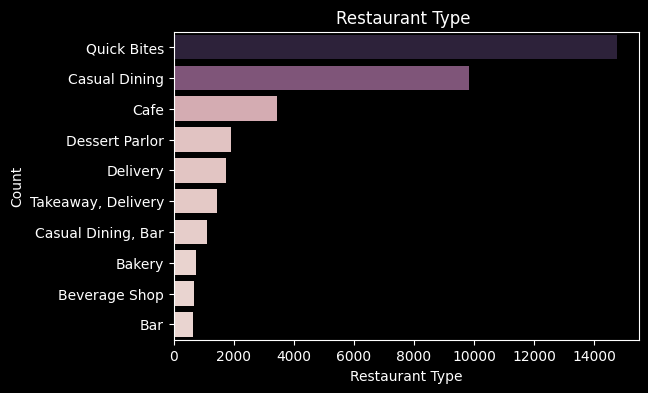

In [32]:
#5 Restaurant Type 

plt.figure(figsize=(6,4))
top_restaurants = zomato['rest_type'].value_counts().head(10)
sns.barplot(x=top_restaurants.values, y=top_restaurants.index , hue = top_restaurants.values , legend = False  )
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Restaurant Type ')
plt.show()

In [33]:
# Insight of #5 and Solution 

# Most restaurants on Zomato are Quick Bites or Casual Dining, meaning people mostly order fast food or eat at casual restaurants. Other types like cafes or dessert places are less.

# Zomato should support the popular Quick Bites and Casual Dining restaurants with offers and promotions to keep customers coming. They should also help smaller or less common restaurant types grow to give customers more choices.

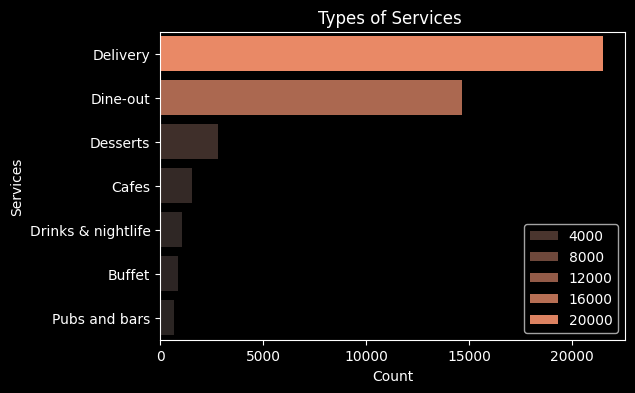

In [34]:
#6 Types of Services 

services_type = zomato['type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=services_type.values , y = services_type.index , hue = services_type.values , palette = 'dark:coral')
plt.xlabel('Count')
plt.ylabel('Services')
plt.title('Types of Services ')
plt.show()

In [35]:
# Insight of #6 and Solution 
# Delivery dominates by a large margin, with far more restaurants offering it compared to services like dine-in, desserts, or cafes.

# For business, Zomato should continue improving the delivery experience and  at the same time, they can encourage more variety—like dine-in or nightlife options to attract different customer needs and make the platform appealing for everyone.

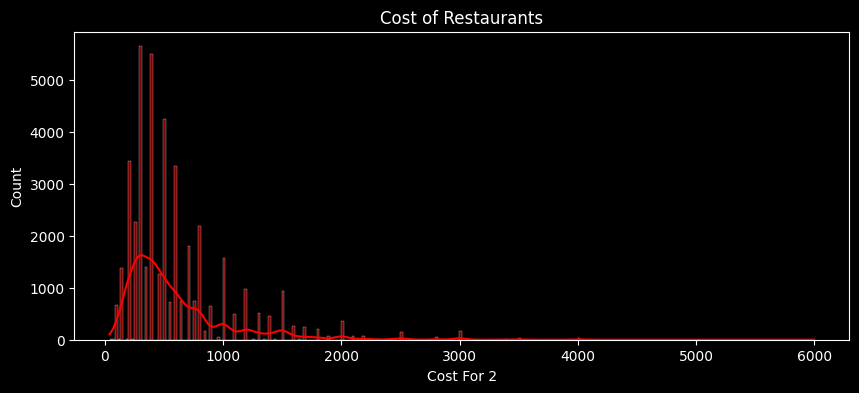

In [36]:
#7 Cost of Restaurant

plt.figure(figsize=(10,4))
sns.histplot(x= 'cost_for2' , data=zomato , kde = True , color = 'red')
plt.xlabel('Cost For 2')
plt.ylabel('Count')
plt.title('Cost of Restaurants')
plt.show()

In [37]:
# Insight of #7 
# The majority of Zomato listed restaurants are affordable, making eating out accessible for a large number of people . Also , expensive dining options are there to cater to a niche audience.


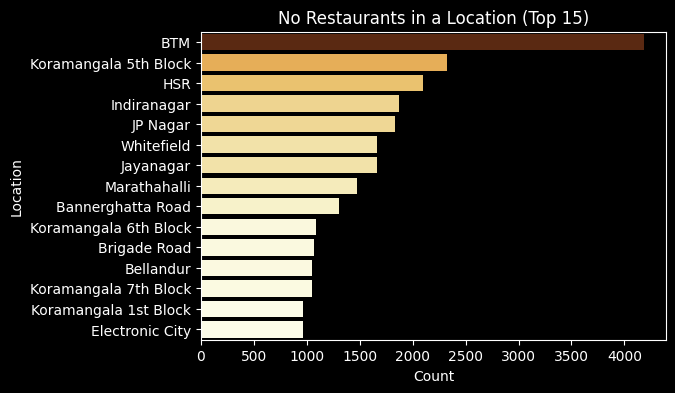

In [38]:
#8 No of Restaurants in a Location 

rest_location = zomato['location'].value_counts().head(15)

plt.figure(figsize=(6,4))
sns.barplot(x = rest_location.values , y = rest_location.index , hue = rest_location.values , legend=False , palette = 'YlOrBr')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('No Restaurants in a Location (Top 15)')
plt.show()

In [39]:
# Insight of #8 and Solution
# These top 15 locations have the highest number of restaurants, showing where eating out is most popular and competition is strongest.

# Zomato should give special attention to these busy areas with targeted deals and promotions for both restaurants and customers. At the same time, they can work on developing less crowded neighborhoods 

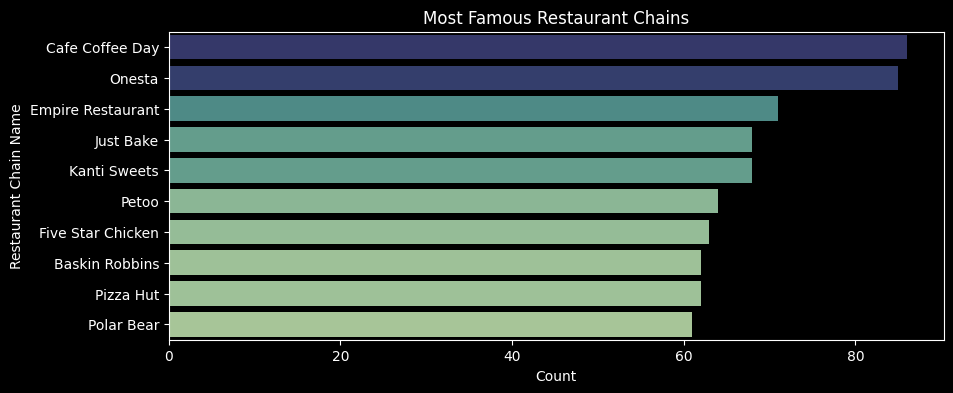

In [40]:
#9 Most Famous Restaurant Chains in Bengaluru

chain_counts = zomato['name'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=chain_counts.values, y=chain_counts.index, hue = chain_counts.values, palette='crest' , legend=False)
plt.title("Most Famous Restaurant Chains")
plt.xlabel("Count")
plt.ylabel("Restaurant Chain Name")
plt.show()

In [41]:
# Insight of #9 

# Most famous restaurant chains in Bengaluru, with Cafe Coffee Day leading, followed by Onesta, Empire Restaurant, and others. These chains have the most outlets across the city, indicating strong brand presence and widespread customer trust.

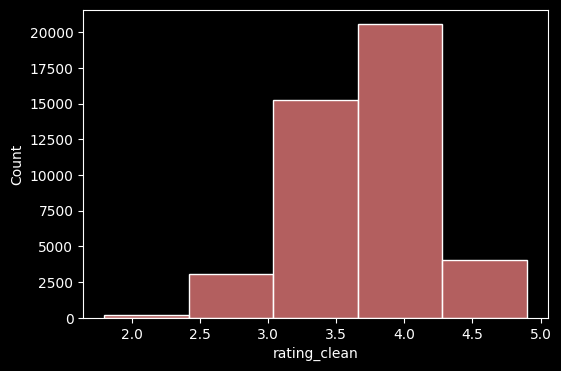

In [42]:
#10 Rating Distributions

plt.figure(figsize=(6,4))
sns.histplot(x = 'rating_clean' , bins = 5 ,data = zomato , color = 'lightcoral')
plt.show()

In [43]:
# Insight of #10 
# Most restaurants have ratings clustered between 3.0 and 4.5, with the largest group around the 4.0 mark. Very few restaurants are rated below 2.5 or above 4.5.

# Zomato can make use of this by highlighting restaurants with the highest ratings to attract quality seeking customers. At the same time, the platform should provide feedback and resources to lower-rated restaurants to help them improve.

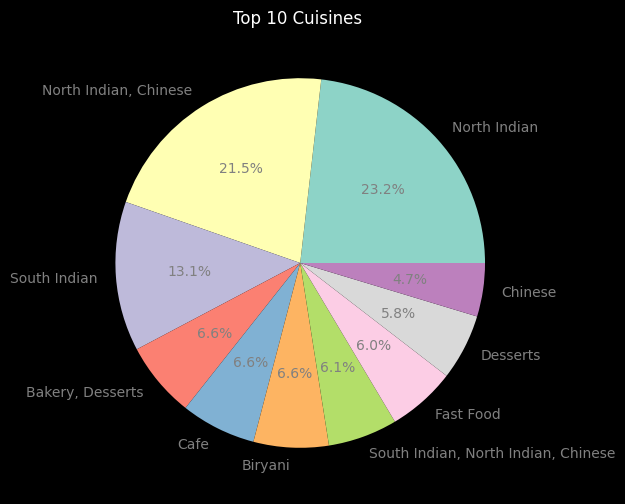

In [44]:
#11 Top Cuisines 

top_cuisines = zomato['cuisines'].value_counts().head(10)

plt.figure(figsize=(6,6))
plt.pie(top_cuisines, labels=top_cuisines.index ,autopct='%1.1f%%', startangle=0, colors=sns.color_palette('Set3', n_colors=10) , textprops = {'color' : 'grey'} )
plt.title('Top 10 Cuisines ')
plt.show()

In [45]:
# Insight of #11 

# North Indian cuisine is the most dominant, followed by combinations like North Indian & Chinese, South Indian, and others such as Bakery, Cafe, Biryani, Fast Food, and Desserts.

In [ ]:
# Multivariate Analysis 

[]

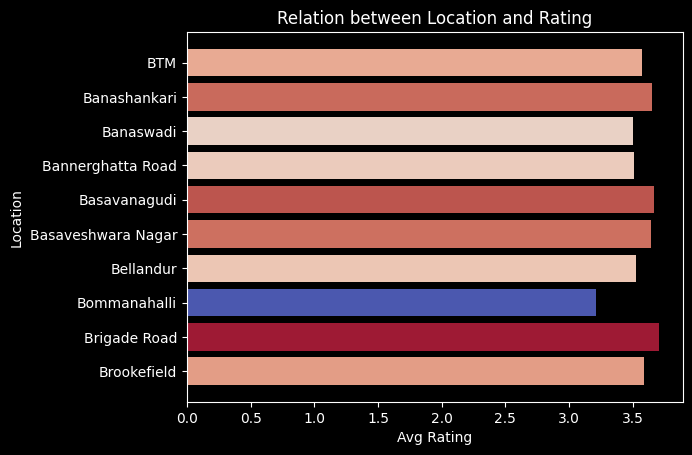

In [47]:
#1 Relation between Location and Rating

loc_rating = zomato.groupby('location')['rating_clean'].mean().head(10)

plt.Figure(figsize=(6,4))
sns.barplot(x = loc_rating.values , y = loc_rating.index , hue= loc_rating.values ,palette = 'coolwarm' , legend = False )
plt.xlabel('Avg Rating')
plt.ylabel('Location')
plt.title('Relation between Location and Rating')
plt.plot()

In [48]:
# Insight of #1 

# While most areas have similar ratings, Brigade Road stands out with the highest average, and Bommanahalli has a noticeably lower average than others. Overall, most locations hover around the 3.5 to 3.7 rating range.

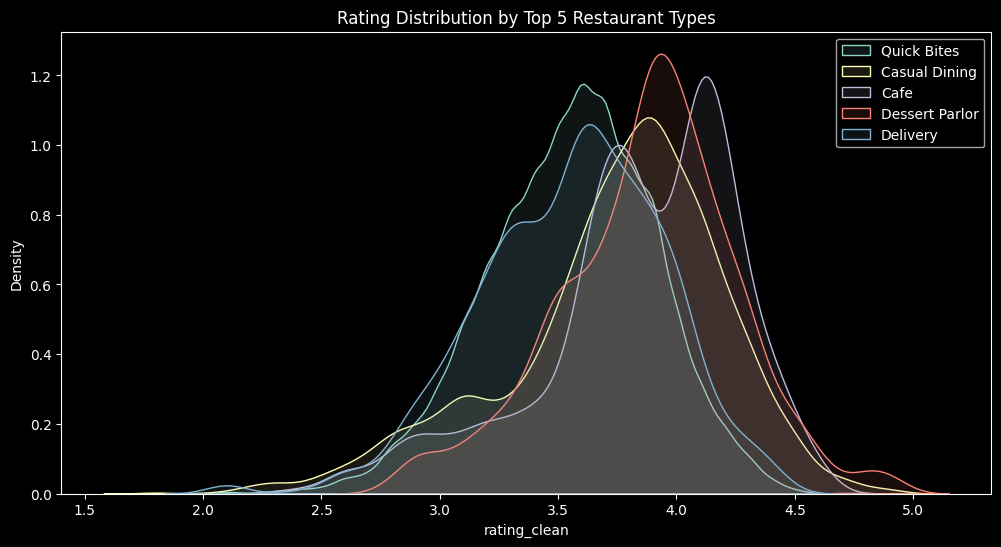

In [49]:
#2 Gaussian Rest type and Rating	
rest_types = zomato['rest_type'].value_counts().index[:5]

plt.figure(figsize=(12,6))

for t in rest_types:
    sns.kdeplot(zomato[zomato['rest_type']==t]['rating_clean'], label=str(t), fill=True, alpha=0.1 , legend=True)

plt.legend()
plt.xlabel("rating_clean")
plt.ylabel("Density")
plt.title("Rating Distribution by Top 5 Restaurant Types")
plt.show()

In [ ]:
# Insight of #2 

# Different restaurant types have distinct rating patterns, with Dessert Parlors and Cafes generally receiving higher customer ratings, suggesting that people are especially satisfied with their experiences there, while Quick Bites and Delivery have a wider spread and slightly lower peaks.

# Zomato should promote high-rated Desserts and Cafes to attract quality-focused customers, while helping Quick Bites and Delivery outlets analyze customer feedback and improve their service to boost ratings

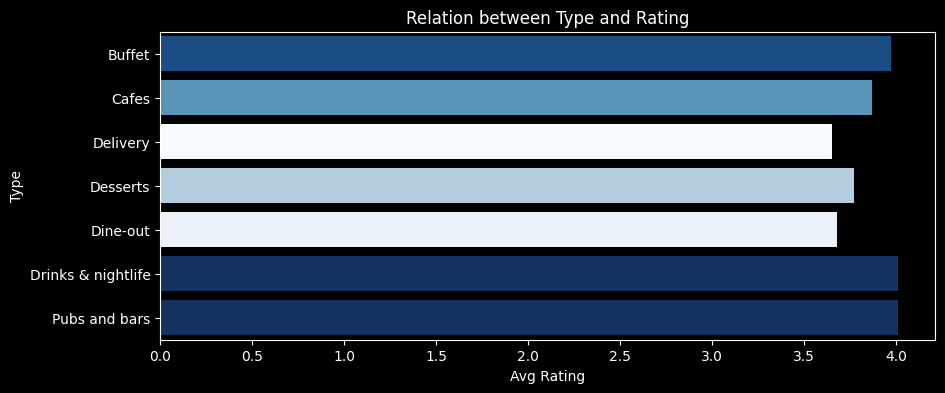

In [51]:
#3 Relation between Type and Rating

type_rating = zomato.groupby('type')['rating_clean'].mean()


plt.figure(figsize=(10,4))

sns.barplot(x = type_rating.values , y = type_rating.index , hue = type_rating , palette = 'Blues' , legend = False)
plt.xlabel('Avg Rating')
plt.ylabel('Type')
plt.title('Relation between Type and Rating')
plt.show()

In [ ]:
# Insight of #3 

# Restaurants that offer Buffets, Drinks & Nightlife, and Cafes generally receive better customer reviews than those focused on Delivery or Dine-out. This suggests that people are more satisfied with their experiences at these types of Restaurants, possibly because of the overall ambiance, service, or experience.

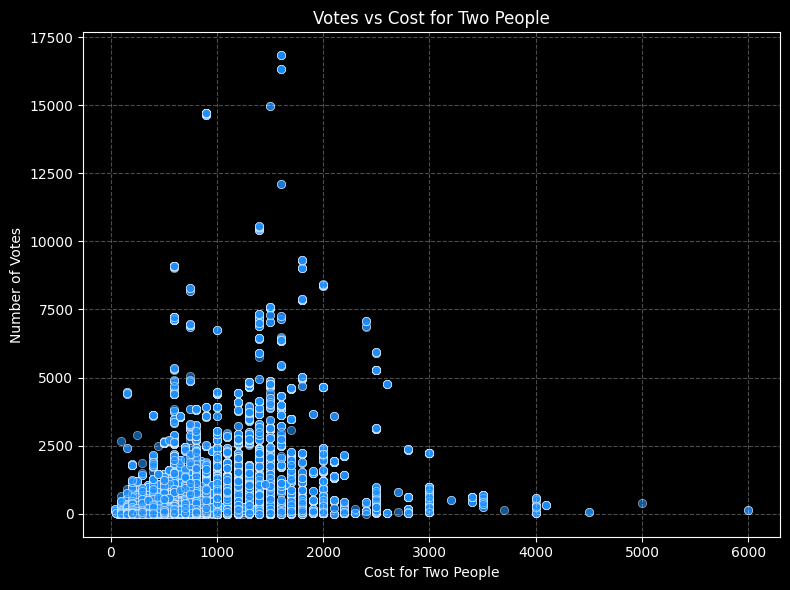

In [52]:
#4 Votes vs Cost

plt.figure(figsize=(8,6))
sns.scatterplot(data=zomato, x='cost_for2', y='votes', color='dodgerblue', alpha=0.6)
plt.title('Votes vs Cost for Two People')
plt.xlabel('Cost for Two People')
plt.ylabel('Number of Votes')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
# Insight of #4 

# Most restaurants with a lower cost for two have significantly more votes, while restaurants with higher prices tend to get fewer votes.This means affordable restaurants attract more customers and engagement on Zomato,

C:\Users\amanv\AppData\Local\Temp\ipykernel_4496\3247545635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


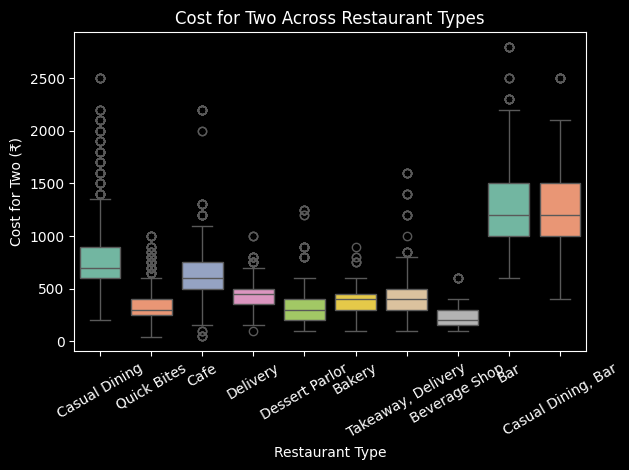

In [53]:
#5 Rest Type vs Cost 

plt.Figure(figsize=(6,4))

top_rest_types = zomato['rest_type'].value_counts().nlargest(10).index
sns.boxplot(
    x='rest_type',
    y='cost_for2',
    data=zomato[zomato['rest_type'].isin(top_rest_types)],
    palette='Set2'
)
plt.title('Cost for Two Across Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Cost for Two (₹)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
# Insight of #5 

# Different restaurant types have very different price points. Places combining dining with bars are much more expensive, while food delivery, quick bites, and cafes are more budget-friendly.